In [ ]:
import pandas as pd
import numpy as np


In [ ]:
cd /content/drive/My\ Drive/mtp/

/content/drive/My Drive/mtp


In [ ]:
dataset = pd.read_csv('Data.tsv' ,delimiter="\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15,16,17,18,19,20,21,24,25,26,28,31,35,36,113,114,115,116,117,118,119,120,121,122,126,186,187,188,189,190,191,192,193,194,212,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,229,230,231,232,233,234,238,239,240,242,256,257,258,259,261,264,265,267,270,271,273,276,279,282,285,286,290,295,297,300,302,303,304,305,310,312,315,317,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,416,424,428,429,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,47

In [ ]:
data = dataset[['ID11','ID14','AN1','MM5','MM10','CO35','CO36','CO37','COTOTAL','COPC','CG3','CG17','CGCOMPUTER','FU1','URBAN2011','NPERSONS','WS10HH',
                'INCBENEFITS','INCOME','INCOMEPC','HHEDUCM','HHEDUC','HHEDUCF']]

In [ ]:
mtp = pd.read_excel('mtp_data1.xlsx')

In [ ]:
mtp.drop(['COTOTAL'], axis = 1, inplace=True)

In [ ]:
mtp['URBAN2011'].value_counts()

0    27579
1    14573
Name: URBAN2011, dtype: int64

In [ ]:
urban = mtp.where(mtp['URBAN2011']== 1)

In [ ]:
urban.dropna(inplace=True)

In [ ]:
urban.to_csv('urban.csv')

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

MSE: 366535336.07598674
[0.         0.         0.         0.62234419 0.00776407 0.
 0.18961911 0.         0.         0.         0.         0.08507705
 0.05539681 0.03979877]
['ID11', 'ID14', 'AN1', 'MM5', 'MM10', 'CG3', 'CGCOMPUTER', 'FU1', 'URBAN2011', 'NPERSONS', 'WS10HH', 'INCBENEFITS', 'INCOME', 'HHEDUC']


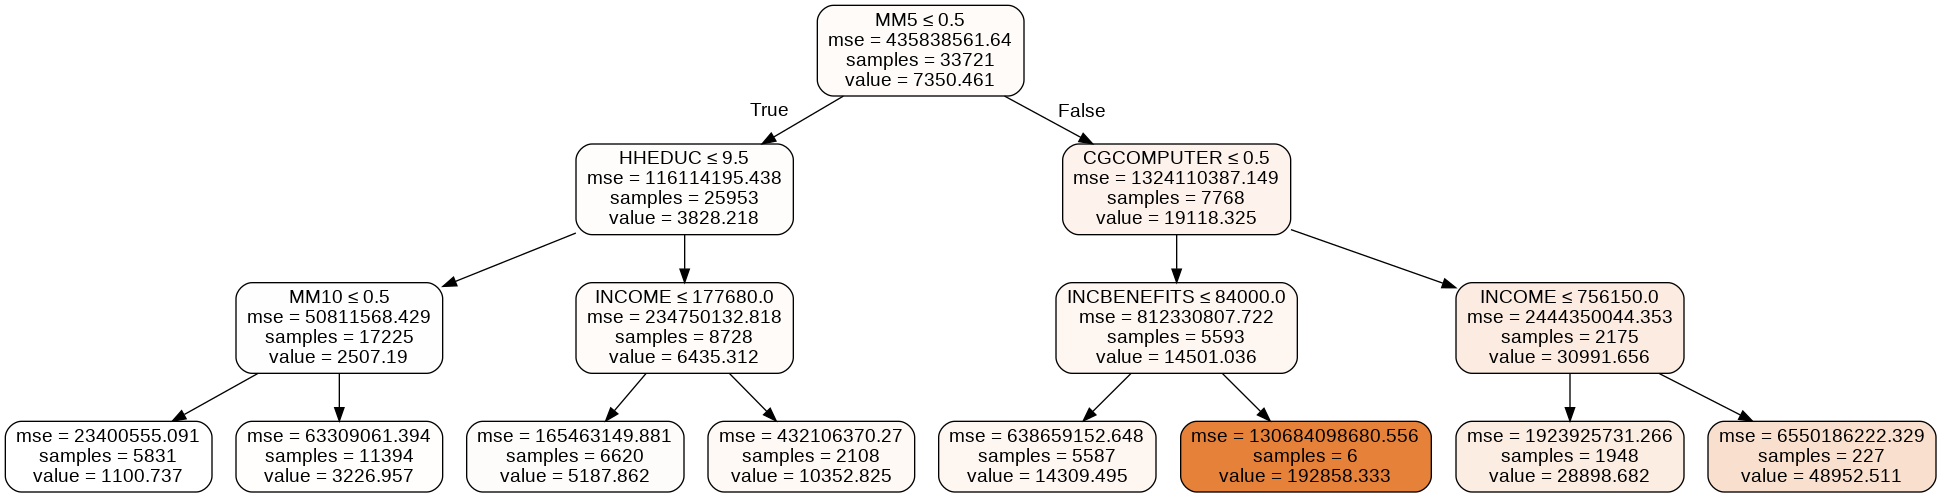

In [ ]:
x = mtp.iloc[:,1:]
y = mtp.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 70% training and 30% test

clf = DecisionTreeRegressor(criterion = 'mse',max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("MSE:",metrics.mean_squared_error(y_test, y_pred)) #478430977

importance = clf.feature_importances_
print(importance)

name = x.columns.values.tolist()
print(name)
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('combined.png')
Image(graph.create_png())


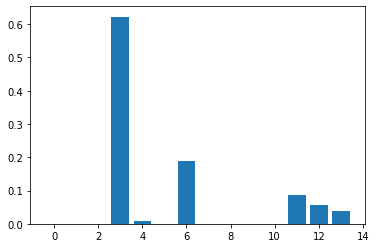

In [ ]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

MSE: 163660316.7284054
[0.         0.         0.         0.54229839 0.0123146  0.
 0.05192566 0.         0.         0.08773331 0.         0.
 0.24942828 0.05629976]
['ID11', 'ID14', 'AN1', 'MM5', 'MM10', 'CG3', 'CGCOMPUTER', 'FU1', 'URBAN2011', 'NPERSONS', 'WS10HH', 'INCBENEFITS', 'INCOME', 'HHEDUC']


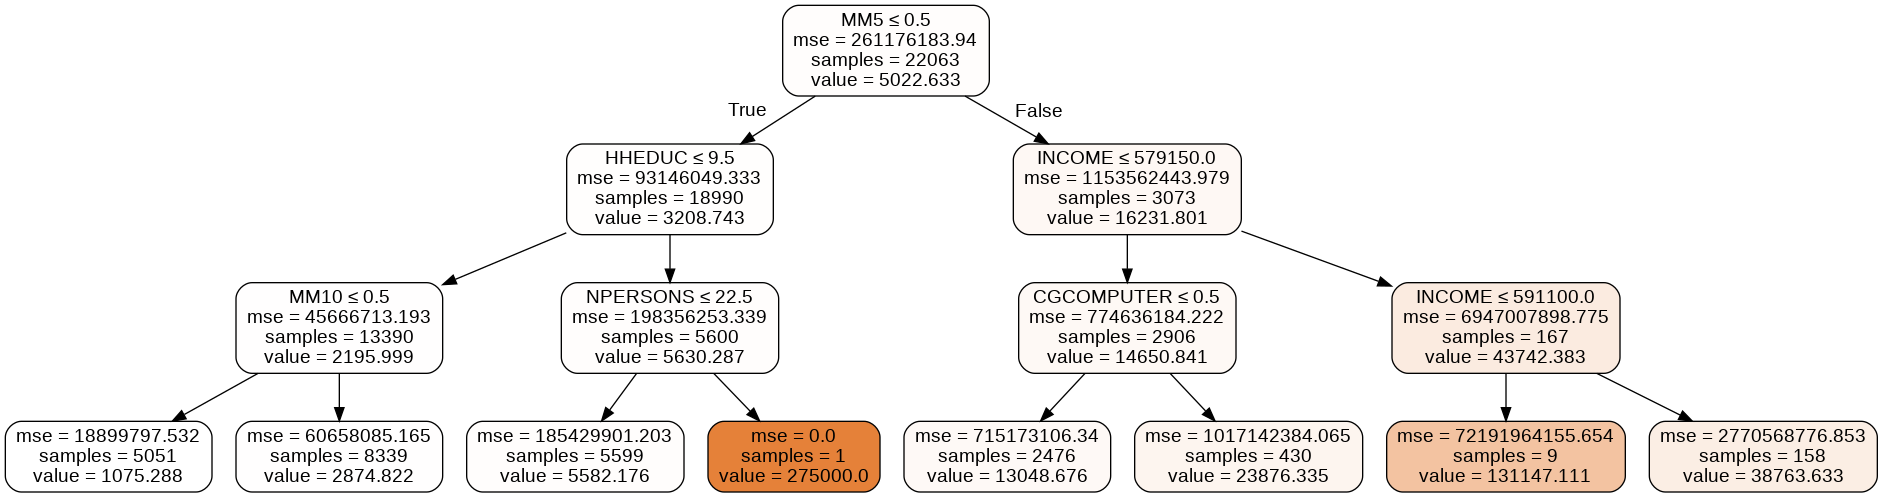

In [ ]:
#Rural
x = rural.iloc[:,1:]
y = rural.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 70% training and 30% test

clf = DecisionTreeRegressor(criterion = 'mse',max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("MSE:",metrics.mean_squared_error(y_test, y_pred)) #478430977

importance = clf.feature_importances_
print(importance)

name = x.columns.values.tolist()
print(name)
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rural.png')
Image(graph.create_png())

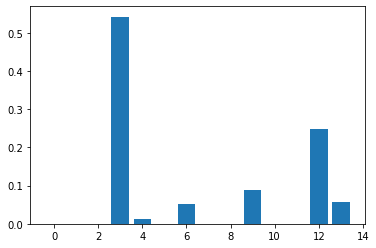

In [ ]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

MSE: 728784386.8037134
[0.         0.         0.         0.14200456 0.         0.
 0.49808636 0.         0.         0.09330078 0.         0.19018427
 0.05329268 0.02313135]
['ID11', 'ID14', 'AN1', 'MM5', 'MM10', 'CG3', 'CGCOMPUTER', 'FU1', 'URBAN2011', 'NPERSONS', 'WS10HH', 'INCBENEFITS', 'INCOME', 'HHEDUC']


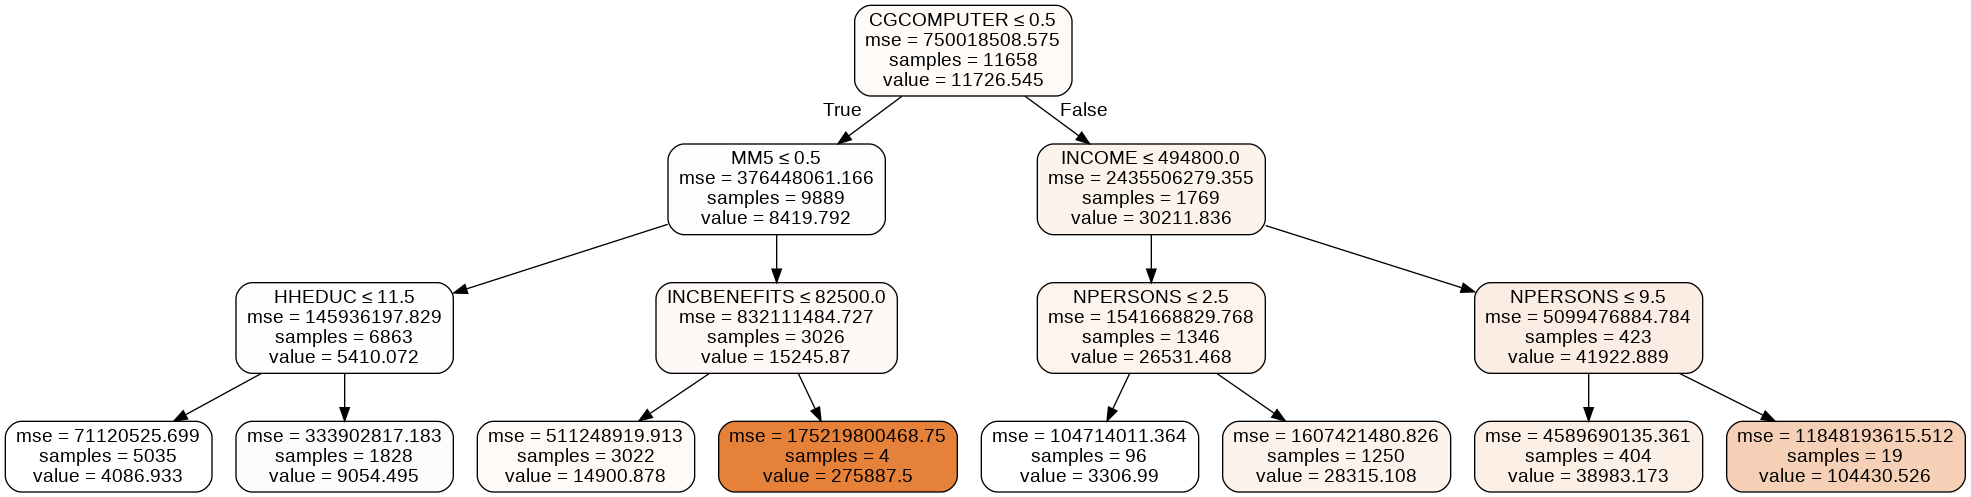

In [ ]:
#Urban
x = urban.iloc[:,1:]
y = urban.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 70% training and 30% test

clf = DecisionTreeRegressor(criterion = 'mse',max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("MSE:",metrics.mean_squared_error(y_test, y_pred)) #478430977

importance = clf.feature_importances_
print(importance)

name = x.columns.values.tolist()
print(name)
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('urban.png')
Image(graph.create_png())

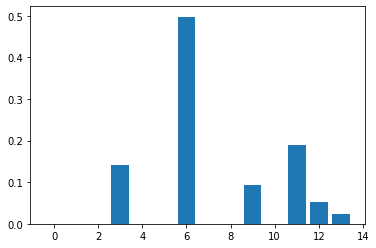

In [ ]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()